In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Generate Gaussian-distributed data (2D)
np.random.seed(42)
data = np.random.multivariate_normal(mean=[0, 0], cov=[[3, 1], [1, 2]], size=500)

In [3]:
# ---- PCA Implementation ----
pca = PCA(n_components=1)  # Reduce to 1 principal component
pca.fit(data)
pca_component = pca.components_[0]  # Principal direction

# ---- Hebbian Learning ----
# Initialize random weights
hebb_weights = np.random.rand(2)
learning_rate = 0.01

# Hebbian update rule: Δw = η * x * y (where y = w · x)
for x in data:
    y = np.dot(hebb_weights, x)  # Output
    hebb_weights += learning_rate * y * x  # Weight update

# Normalize Hebbian weights to compare with PCA
hebb_weights /= np.linalg.norm(hebb_weights)

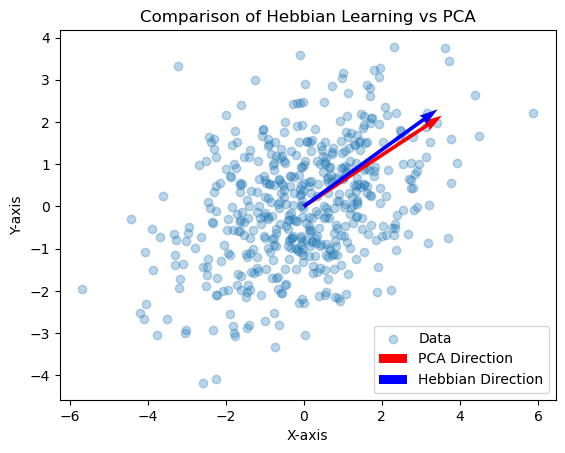

In [4]:
# ---- Plot Results ----
plt.scatter(data[:, 0], data[:, 1], alpha=0.3, label="Data")

# Plot PCA and Hebbian directions
plt.quiver(0, 0, pca_component[0], pca_component[1], color='red', scale=3, label="PCA Direction")
plt.quiver(0, 0, hebb_weights[0], hebb_weights[1], color='blue', scale=3, label="Hebbian Direction")

plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Comparison of Hebbian Learning vs PCA")
plt.show()